
# INSTRUÇÃO PRÁTICA - IP-P010
## PP - PROGRAMAÇÃO EM PYTHON
### OBJETIVOS DA ATIVIDADE

Revisar e consolidar o conteúdo de __Pandas__ e visualização de dados avançado.




Gere um data frame contendo as seguintes colunas

- CPF;
- Nme;
- Idade (entre 18 e 28);
- Sexo;
- Endereço de email;
- Nota no ENEM (entre 640 e 800)
- Abandono (True o False)
- Qual semestre (entre 1 e 8, se Abandono for True)
- CRA após o segundo semestre (float entre 5 e 10)
- CRA após o quarto semestre (float entre 5 e 10)
- CRA após o Sexto semestre (float entre 5 e 10)

In [4]:
import pandas as pd
from faker import Faker
import random
import os
fake = Faker()
random.seed(42)

data = []
for _ in range(1000):
    cpf = fake.unique.random_number(digits=11)
    nome = fake.name()
    sexo = fake.random_element(elements=('Masculino', 'Feminino')) if nome.split()[0][-1] != 'a' else 'Feminino'
    idade = fake.random_int(min=18, max=28)
    email = fake.email()
    nota_enem = fake.random_int(min=640, max=800)
    abandono = random.choices([True, False], weights=[0.3, 0.7])[0]
    semestre = fake.random_int(min=1, max=8) if abandono else None
    cra_segundo_semestre = fake.pyfloat(min_value=5, max_value=10, right_digits=2)
    cra_quarto_semestre = fake.pyfloat(min_value=5, max_value=10, right_digits=2)
    cra_sexto_semestre = fake.pyfloat(min_value=5, max_value=10, right_digits=2)

    data.append([cpf, nome, idade, sexo, email, nota_enem, abandono, semestre, cra_segundo_semestre, cra_quarto_semestre, cra_sexto_semestre])

df = pd.DataFrame(data, columns=['CPF', 'Nome', 'Idade', 'Sexo', 'Email', 'Nota ENEM', 'Abandono', 'Qual Semestre', 'CRA após o 2º Semestre', 'CRA após o 4º Semestre', 'CRA após o 6º Semestre'])

caminho_arquivo = 'C:/Users/edu__/OneDrive/Documentos/Atividade 19-02-2024/data_enem.csv'


diretorio = os.path.dirname(caminho_arquivo)
if not os.path.exists(diretorio):
    os.makedirs(diretorio)


df.to_csv(caminho_arquivo, index=False)

display(df)


,CPF,Nome,Idade,Sexo,Email,Nota ENEM,Abandono,Qual Semestre,CRA após o 2º Semestre,CRA após o 4º Semestre,CRA após o 6º Semestre
0,52421745257,Anthony Bradshaw,26,Feminino,costarobert@example.com,716,False,NaN,7.19,9.98,9.50
1,80197789708,James Cantu,24,Masculino,kevincrawford@example.net,680,True,2.0,6.95,8.57,5.60
2,70391555926,Karen Weeks,19,Feminino,avang@example.com,696,True,4.0,5.65,8.87,5.61
3,64197146962,Rachael Walsh,23,Feminino,bullockrenee@example.com,703,True,7.0,6.11,7.41,8.75
4,50027884117,Nicole Morris,19,Feminino,ashleywagner@example.org,738,False,NaN,9.60,7.89,9.92
...,...,...,...,...,...,...,...,...,...,...,...
995,2336298162,Mary Hughes,19,Feminino,annehoffman@example.net,664,True,1.0,7.00,8.11,7.10
996,73582556393,Kristen Manning,18,Masculino,lukedaniels@example.net,798,False,NaN,8.40,7.60,7.28
997,84201250139,Scott Obrien,26,Masculino,amy10@example.org,640,False,NaN,6.61,7.86,7.62
998,434075729,Sergio Ali,22,Masculino,steventrujillo@example.net,741,False,NaN,9.00,8.82,9.27


#### Identifique a relação de alunos de sexo masculino e feminino no conjunto:

In [9]:
sexo_counts = df['Sexo'].value_counts()
print(sexo_counts)


Sexo
Feminino     570
Masculino    430
Name: count, dtype: int64


#### Mostre a média da nota do ENEM dos alunos agrupados por idade:


In [10]:
idade_media_nota = df.groupby('Idade')['Nota ENEM'].mean()
print(idade_media_nota)


Idade
18    730.747253
19    720.893333
20    719.964286
21    714.284091
22    714.151515
23    723.344828
24    719.200000
25    723.020833
26    718.163265
27    715.077778
28    713.970588
Name: Nota ENEM, dtype: float64


#### Normalize as notas do ENEM de todos os alunos para um valor entre 5 e 10:

In [12]:
min_nota_enem = df['Nota ENEM'].min()
max_nota_enem = df['Nota ENEM'].max()
df['Nota ENEM Normalizada'] = 5 + ((df['Nota ENEM'] - min_nota_enem) / (max_nota_enem - min_nota_enem)) * 5
display(df[['Nota ENEM', 'Nota ENEM Normalizada']])


,Nota ENEM,Nota ENEM Normalizada
0,716,7.37500
1,680,6.25000
2,696,6.75000
3,703,6.96875
4,738,8.06250
...,...,...
995,664,5.75000
996,798,9.93750
997,640,5.00000
998,741,8.15625


##### Faça um gráfico de evolução das notas desde o ENEM até CRA do sexto semestre para os 10 alunos com melhor CRA no sexto semestre. Utilize a nota do ENEM normalizada. Coloque no gráfico círculos se o aluno for de sexo feminino e quadrados se for masculino:

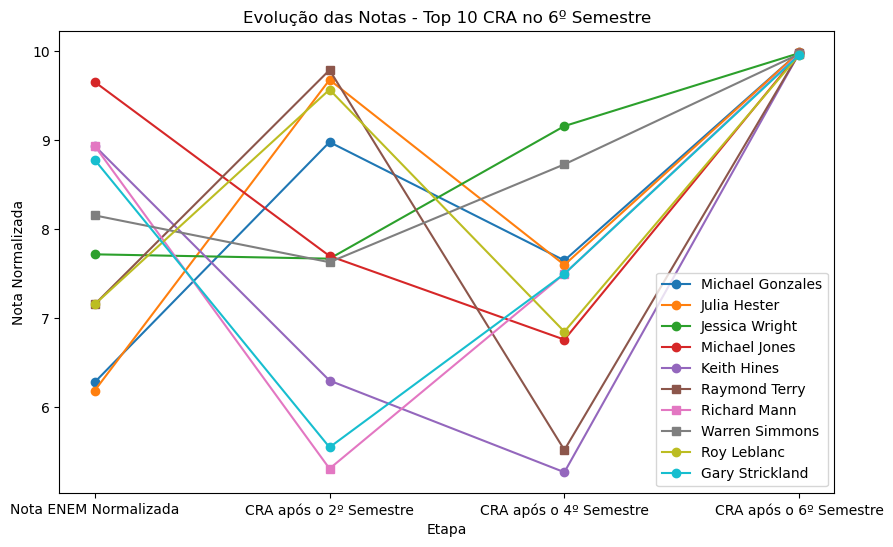

In [13]:
import matplotlib.pyplot as plt

top_10_cra_sexto = df.nlargest(10, 'CRA após o 6º Semestre')
markers = {'Masculino': 's', 'Feminino': 'o'}

plt.figure(figsize=(10, 6))
for index, row in top_10_cra_sexto.iterrows():
    marker = markers[row['Sexo']]
    plt.plot(['Nota ENEM Normalizada', 'CRA após o 2º Semestre', 'CRA após o 4º Semestre', 'CRA após o 6º Semestre'],
             [row['Nota ENEM Normalizada'], row['CRA após o 2º Semestre'], row['CRA após o 4º Semestre'], row['CRA após o 6º Semestre']],
             marker=marker, label=row['Nome'])

plt.title('Evolução das Notas - Top 10 CRA no 6º Semestre')
plt.xlabel('Etapa')
plt.ylabel('Nota Normalizada')
plt.legend()
plt.show()
